In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

In [24]:
import pandas as pd
# Файл не содержит заголовков столбцов, поэтому мы передаем header=None
# и записываем имена столбцов прямо в "names"
data = pd.read_csv("adult.csv", header=0, index_col=False,
                names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'gender',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'income'])
# В целях упрощения мы выберем лишь некоторые столбцы
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
'occupation', 'income']]
# IPython.display позволяет вывести красивый вывод, отформатированный в Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [25]:
print(data.gender.value_counts())

Male      21790
Female    10771
Name: gender, dtype: int64


In [26]:
print("Исходные признаки:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Признаки после get_dummies:\n", list(data_dummies.columns))

Исходные признаки:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Признаки после get_dummies:
 ['age', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_10th', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'gender_Female', 'gender_Male', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service',

In [27]:
data_dummies.head().shape

(5, 46)

In [30]:
# Берем только те столбцы, которые содержат признаки,
# то есть все столбцы, начиная с 'age' и заканчивая 'occupation_ Transport-moving'
# Этот диапазон содержит все признаки, кроме целевой переменной
features = data_dummies.ix[:, 'age':'occupation_Transport-moving']
# Извлекаем массивы NumPy
X = features.values
y = data_dummies['income_>50K'].values
print("форма массива X: {} форма массива y: {}".format(X.shape, y.shape))

форма массива X: (32561, 44) форма массива y: (32561,)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(logreg.score(X_test, y_test)))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Правильность на тестовом наборе: 0.81


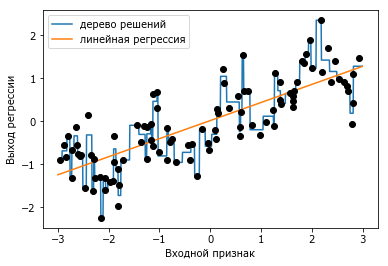

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="дерево решений")
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="линейная регрессия")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

In [33]:
bins = np.linspace(-3, 3, 11)
print("категории: {}".format(bins))

категории: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [36]:
which_bin = np.digitize(X, bins=bins)
print("\nТочки данных:\n", X[:10])
print("\nКатегории для точек данных:\n", which_bin[:10])


Точки данных:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]

Категории для точек данных:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]
 [ 2]
 [ 1]
 [ 9]
 [ 7]
 [ 8]]


In [37]:
from sklearn.preprocessing import OneHotEncoder
# преобразовываем с помощью OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit находит уникальные значения, имеющиеся в which_bin
encoder.fit(which_bin)
# transform осуществляет прямое кодирование
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [38]:
print("форма массива X_binned: {}".format(X_binned.shape))

форма массива X_binned: (100, 10)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Text(0.5, 0, 'Входной признак')

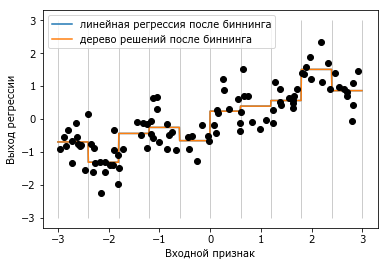

In [56]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
print(line_binned)
reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='линейная регрессия после биннинга')
reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='дерево решений после биннинга')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")

In [48]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


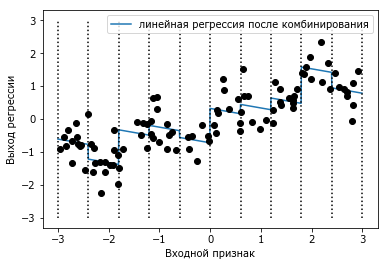

In [51]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='линейная регрессия после комбинирования')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.plot(X[:, 0], y, 'o', c='k')

In [62]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
print(X_product[:5])

(100, 20)
[[ 0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.         -0.         -0.
  -0.         -0.75275929 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          2.70428584]
 [ 0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          1.39196365
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.59195091  0.          0.
   0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.
   0.          0

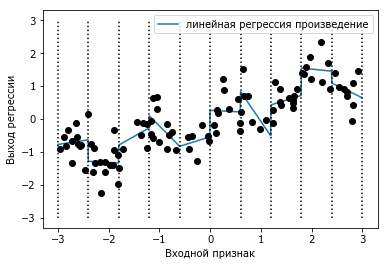

In [60]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='линейная регрессия произведение')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

In [63]:
from sklearn.preprocessing import PolynomialFeatures
# задаем степень полинома 10:
# значение по умолчанию "include_bias=True" добавляет признак-константу 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [64]:
print("форма массива X_poly: {}".format(X_poly.shape))

форма массива X_poly: (100, 10)


In [65]:
print("Элементы массива X:\n{}".format(X[:5]))
print("Элементы массива X_poly:\n{}".format(X_poly[:5]))

Элементы массива X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Элементы массива X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


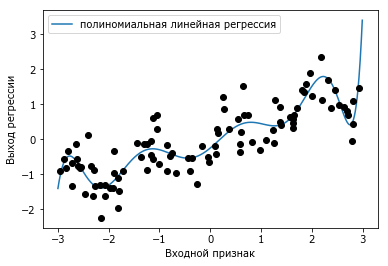

In [66]:
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

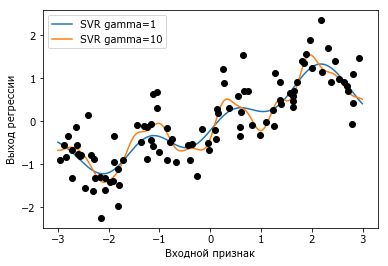

In [68]:
from sklearn.svm import SVR
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

In [78]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,random_state=0)
# масштабируем данные
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("форма обучающего массива X: {}".format(X_train.shape))
print("форма обучающего массива X полиномы и взаим: {}".format(X_train_poly.shape))

форма обучающего массива X: (379, 13)
форма обучающего массива X полиномы и взаим: (379, 105)


In [79]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("R-квадрат на тестовом наборе без взаимодействий: {:.3f}".format(
ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("R-квадрат на тестовом наборе с взаимодействиями: {:.3f}".format(
ridge.score(X_test_poly, y_test)))

R-квадрат на тестовом наборе без взаимодействий: 0.621
R-квадрат на тестовом наборе с взаимодействиями: 0.753


In [80]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("R-квадрат на тестовом наборе без взаимодействий: {:.3f}".format(
rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("R-квадрат на тестовом наборе с взаимодействиями: {:.3f}".format(rf.score(X_test_poly, y_test)))

R-квадрат на тестовом наборе без взаимодействий: 0.801
R-квадрат на тестовом наборе с взаимодействиями: 0.773


In [81]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Частоты значений:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


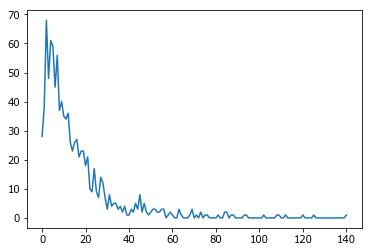

In [96]:
np_bincount_X = np.bincount(X[:, 0])
plt.plot(np.arange(len(np_bincount_X)), np_bincount_X)
print("Частоты значений:\n{}".format(np_bincount_X))

Text(0.5, 0, 'Значение')

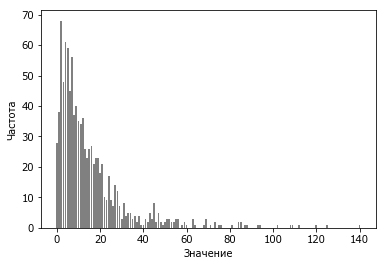

In [102]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='gray')
plt.ylabel("Частота")
plt.xlabel("Значение")

In [103]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("R-квадрат на тестовом наборе: {:.3f}".format(score))

R-квадрат на тестовом наборе: 0.622


In [104]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Значение')

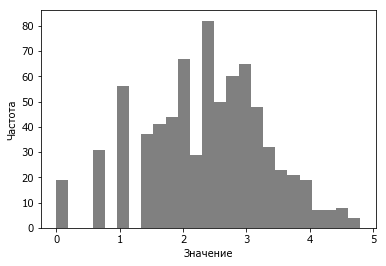

In [105]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Частота")
plt.xlabel("Значение")

In [106]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("R-квадрат на тестовом наборе: {:.3f}".format(score))

R-квадрат на тестовом наборе: 0.875


In [109]:
score = Ridge().fit(X_train_log, y_train).score(X_test, y_test)
print("R-квадрат на тестовом наборе: {:.3f}".format(score))

R-квадрат на тестовом наборе: -609.276


In [113]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# задаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select.transform(X_train)
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

30
форма массива X_train: (284, 80)
форма массива X_train_selected: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Индекс примера')

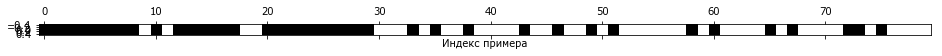

In [116]:
mask = select.get_support()
print(mask)
# визуализируем булевы значения: черный – True, белый – False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")

In [127]:
from sklearn.linear_model import LogisticRegression
# преобразовываем тестовые данные
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Правильность со всеми признаками: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Правильность только с отобранными признаками: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Правильность со всеми признаками: 0.930
Правильность только с отобранными признаками: 0.940


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [128]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

In [129]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X c l1: {}".format(X_train_l1.shape))

форма обуч набора X: (284, 80)
форма обуч набора X c l1: (284, 40)


Text(0.5, 0, 'Индекс примера')

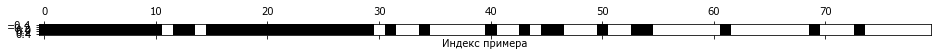

In [131]:
mask = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")

In [132]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.951


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 0, 'Индекс примера')

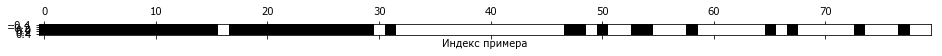

In [133]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
n_features_to_select=40)
select.fit(X_train, y_train)
# визуализируем отобранные признаки:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")

In [134]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.951


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [135]:
print("Правильность на тестовом наборе: {:.3f}".format(select.score(X_test, y_test)))

Правильность на тестовом наборе: 0.951


In [151]:
def load_citibike():
    data_mine = pd.read_csv("citibike.csv")
    display(data_mine.head())
    data_mine['one'] = 1
    
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    display(data_resampled.head())
    display(data_resampled.one)
    return data_resampled.one
citibike = load_citibike()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,one
starttime,,,,,,,,,,,
2013-06-01 00:00:00,818789,141272,13073.649152,-23751.138666,141147.0,12788.707686,-23232.625598,5691425,453216.0,264,321
2013-06-01 03:00:00,158757,26130,2850.882293,-5179.458215,30632.0,2728.758344,-4957.408935,1236712,85132.0,46,70
2013-06-01 06:00:00,621045,139477,12625.924434,-22937.097203,130547.0,12219.104003,-22197.216164,5456893,532613.0,328,310
2013-06-01 09:00:00,2332865,500810,45944.070476,-83461.462146,518600.0,44436.983003,-80724.517946,19701634,1702281.0,1096,1128
2013-06-01 12:00:00,4523040,835587,78609.451607,-142802.569159,828954.0,75675.972844,-137476.631874,33972597,2448095.0,1553,1930


starttime
2013-06-01 00:00:00     321
2013-06-01 03:00:00      70
2013-06-01 06:00:00     310
2013-06-01 09:00:00    1128
2013-06-01 12:00:00    1930
2013-06-01 15:00:00    2105
2013-06-01 18:00:00    1851
2013-06-01 21:00:00    1007
2013-06-02 00:00:00     532
2013-06-02 03:00:00     129
2013-06-02 06:00:00     351
2013-06-02 09:00:00    2251
2013-06-02 12:00:00    4235
2013-06-02 15:00:00    4397
2013-06-02 18:00:00    3128
2013-06-02 21:00:00     948
2013-06-03 00:00:00      92
2013-06-03 03:00:00      24
2013-06-03 06:00:00     442
2013-06-03 09:00:00     559
2013-06-03 12:00:00    1509
2013-06-03 15:00:00    1802
2013-06-03 18:00:00    2238
2013-06-03 21:00:00     932
2013-06-04 00:00:00     191
2013-06-04 03:00:00      73
2013-06-04 06:00:00    1975
2013-06-04 09:00:00    2098
2013-06-04 12:00:00    2474
2013-06-04 15:00:00    3351
                       ... 
2013-06-27 09:00:00    3937
2013-06-27 12:00:00    3502
2013-06-27 15:00:00    5138
2013-06-27 18:00:00    5780
2013-06-27

In [146]:
print("данные Citi Bike:\n{}".format(citibike.head()))

данные Citi Bike:
starttime
2013-06-01 00:00:00     321
2013-06-01 03:00:00      70
2013-06-01 06:00:00     310
2013-06-01 09:00:00    1128
2013-06-01 12:00:00    1930
Freq: 3H, Name: one, dtype: int64


/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Частота проката')

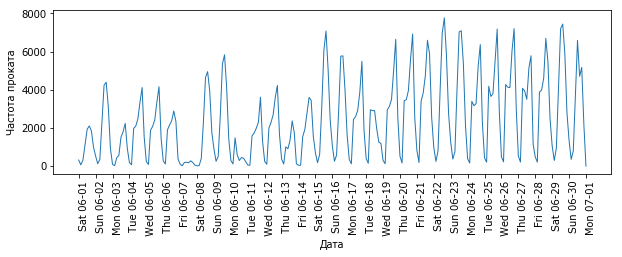

In [147]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Дата")
plt.ylabel("Частота проката")

In [152]:
y = citibike
print(type(y))
# преобразуем время в формат POSIX с помощью "%s"
X = citibike.index.astype("int64").reshape(-1, 1) // 10**9

<class 'pandas.core.series.Series'>


AttributeError: 'Int64Index' object has no attribute 'reshape'